In [1]:
import numpy as np
import pandas as pd
import os
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

### Reading outputs

In [2]:
OUTPUT_PATH = 'outputs/'
ALGORITHMS = ['dp1', 'dp2', 'greedy', 'bf', 'bnb', 'cplex']
LEVELS = [2]
LEVELS_SIZE = [6664]

dataframes = defaultdict(list)
columns = ['Id','Funcion Objectivo','Tiempo']
for alg in ALGORITHMS:
    file = open(OUTPUT_PATH+alg + "_" + str(2),'r')
    for row in file:
        id_, fo, time = row.split()
        dataframes[str(alg)].append({'Id':(int)(id_),'Funcion Objetivo':(float)(fo),'Time':(float)(time)})
    #dataframes[index] = pd.read_csv(file, names = columns,header=None)

In [3]:
vector = [0]*len(ALGORITHMS)
for alg, index in zip(ALGORITHMS,range(len(ALGORITHMS))):
    vector[index] = pd.DataFrame(data=dataframes[alg])
#vector
#dataframes

In [4]:
vector[0][vector[0].Id == 1050]

,Funcion Objetivo,Id,Time
59,35476.0,1050,0.001954


In [5]:
instancia = 1050

for alg, index in zip(ALGORITHMS,range(len(ALGORITHMS))):
    df = vector[index][vector[index].Id == instancia]
    print(df)

    Funcion Objetivo    Id      Time
59           35476.0  1050  0.001954
     Funcion Objetivo    Id      Time
109           27422.0  1050  0.100012
110           35476.0  1050  0.114945
    Funcion Objetivo    Id      Time
59           35394.0  1050  0.001703
    Funcion Objetivo    Id  Time
59              -1.0  1050  -1.0
     Funcion Objetivo    Id      Time
285           14521.0  1050  0.001681
286           26619.0  1050  0.001747
287           35476.0  1050  0.001782
288           35476.0  1050  0.002167
     Funcion Objetivo    Id      Time
134          475344.0  1050  0.056720
135           35476.0  1050  0.061745


Agregando la cola desde cero

   Funcion Objetivo      Time
0               0.0  0.000000
1           35476.0  0.001954
2           35476.0  0.114945
   Funcion Objetivo      Time
0               0.0  0.000000
1           27422.0  0.100012
2           35476.0  0.114945
3           35476.0  0.114945
   Funcion Objetivo      Time
0               0.0  0.000000
1           35394.0  0.001703
2           35394.0  0.114945
       Time  Funcion Objetivo
0  0.000000               0.0
1  0.114945               0.0
   Funcion Objetivo      Time
0               0.0  0.000000
1           14521.0  0.001681
2           26619.0  0.001747
3           35476.0  0.001782
4           35476.0  0.002167
5           35476.0  0.114945
   Funcion Objetivo      Time
0               0.0  0.000000
2           35476.0  0.061745


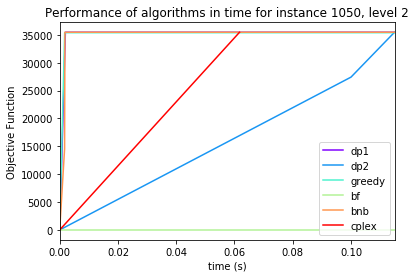

In [6]:
from matplotlib.pyplot import cm

instancia = 1050
lvl = 2
n = len(ALGORITHMS)
color=iter(cm.rainbow(np.linspace(0,1,n)))
final = max([vector[i][vector[i].Id==instancia]['Time'].iloc[-1] for i in range(5)])
for alg, index in zip(ALGORITHMS,range(len(ALGORITHMS))):
    df = vector[index][vector[index].Id==instancia][['Time','Funcion Objetivo']]
    c=next(color)
    if df['Time'].iloc[0] == -1.0:
        dos = {'Time': [0.0],'Funcion Objetivo': [0.0]}
        to_plot = pd.DataFrame.from_dict(dos, orient = 'columns')
        to_plot = to_plot.append({'Time': final,'Funcion Objetivo': 0.0}, ignore_index=True)
        plt.plot(to_plot['Time'],to_plot['Funcion Objetivo'], c=c, label=str(alg))
    else:
        data = []
        data.insert(0, {'Time': 0.0, 'Funcion Objetivo': 0.0})
        to_plot = df.copy()
        to_plot = pd.concat([pd.DataFrame(data), to_plot], ignore_index=True, sort=False)
        if alg == 'cplex':
            if to_plot['Funcion Objetivo'].iloc[1] > to_plot['Funcion Objetivo'].iloc[2]:
                to_plot = to_plot.drop([1])
            plt.plot(to_plot['Time'],to_plot['Funcion Objetivo'], c=c, label=str(alg))
        else:
            to_plot = to_plot.append({'Time':final,'Funcion Objetivo':df['Funcion Objetivo'].iloc[-1]}, ignore_index=True)
            plt.plot(to_plot['Time'],to_plot['Funcion Objetivo'], c=c, label=str(alg))
    print(to_plot)
    to_plot = []
plt.legend()
plt.title('Performance of algorithms in time for instance %d, level %d'%(instancia, lvl))
plt.xlabel('time (s)')
plt.xlim(0, final)
plt.ylabel('Objective Function')
plt.savefig('instance_%d_level_%d.png'%(instancia, lvl))
#plt.show()

Sin la cola

copy          Time  Funcion Objetivo
134  0.056720          475344.0
135  0.061745           35476.0


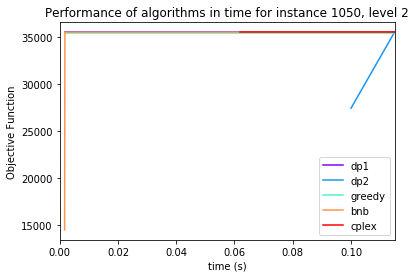

In [199]:
from matplotlib.pyplot import cm

instancia = 1050
lvl = 2
n = len(ALGORITHMS)
color=iter(cm.rainbow(np.linspace(0,1,n)))
final = max([vector[i][vector[i].Id==instancia]['Time'].iloc[-1] for i in range(5)])
for alg, index in zip(ALGORITHMS,range(len(ALGORITHMS))):
    df = vector[index][vector[index].Id==instancia][['Time','Funcion Objetivo']]
    c=next(color)
    if df['Time'].iloc[0] == -1.0:
        #dos = {'Time': [0.0],'Funcion Objetivo': [0.0]}
        #to_plot = pd.DataFrame.from_dict(dos, orient = 'columns')
        #to_plot = to_plot.append({'Time': final,'Funcion Objetivo': 0.0}, ignore_index=True)
        #plt.plot(to_plot['Time'],to_plot['Funcion Objetivo'], c=c, label=str(alg))
        pass
    else:
        to_plot = df.copy()
        if alg == 'cplex':
            print('copy',to_plot)
            if to_plot['Funcion Objetivo'].iloc[0] > to_plot['Funcion Objetivo'].iloc[1]:
                #to_plot = to_plot.drop([to_plot.loc[0]])
                to_plot = to_plot[to_plot['Funcion Objetivo'] != to_plot['Funcion Objetivo'].iloc[0]]
            to_plot = to_plot.append({'Time':final,'Funcion Objetivo':df['Funcion Objetivo'].iloc[-1]}, ignore_index=True)
            plt.plot(to_plot['Time'],to_plot['Funcion Objetivo'], c=c, label=str(alg))
        else:
            to_plot = to_plot.append({'Time':final,'Funcion Objetivo':df['Funcion Objetivo'].iloc[-1]}, ignore_index=True)
            plt.plot(to_plot['Time'],to_plot['Funcion Objetivo'], c=c, label=str(alg))
    #print(to_plot)
    to_plot = []
plt.legend()
plt.title('Performance of algorithms in time for instance %d, level %d'%(instancia, lvl))
plt.xlabel('time (s)')
plt.xlim(0, final)
plt.ylabel('Objective Function')
plt.savefig('foo.png')
#plt.show()